# Introduction


### The growth of supermarket in the most populated cities in Asia are increasing. The project aims to analyze supermarket sales across different branches and provide insight to understand the customer better.

## Dataset Description:
#### Instances: 1000
#### Features: 17 columns
#### Numerical: 8 columns
#### Categorical: 9 columns

In [20]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import datetime
import warnings
warnings.filterwarnings("ignore")


In [21]:
#Import dataset
market=pd.read_csv("C:/Users/Chinmay/Downloads/supermarket_sales (1).csv")
market

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Dataset description

### Invoice id: Computer generated sales slip invoice identification number  ## Branch: Branch of supermarket 
### City: Location of supermarket
### Customer type: Type of customers, recorded by Members for                        customers using member card and Normal for without member card 

### Gender: Product line Gender type of customer (Male/Female)

### Productline: General item categorization groups Electronic  accessories, Fashion accessories, Food and beverages, Health and          beauty, Home and lifestyle, Sports and travel

### Unit price : Price of each product in    

### Quantity: Number of products purchased by customer                          

### Tax: 5% tax fee for customer buying              

### Total: Total price including tax

### Date :Date of purchase (Record available from January 2019 to March          2019)                                                                                                              

### Time: Purchase time (10am to 9pm)                                                          

### Payment: Payment used by customer for purchase (3 methods are              available - Cash, Credit card and E-wallet)                                                

### COGS: Gross margin Cost of goods sold 15                                            

### Gross margin percentage: Gross margin percentage                                

### Gross income: 16 Gross income from customers i.e. income of                    supermarket and spend by customer 

In [22]:
market.head(12)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Rename variables

In [23]:
market.rename(index=str,columns={"Customer type":"Customer_type","Product line":"Product_line","Unit price":"Unit_price","gross margin percentage":"gross_margin_percentage","gross income":"gross_income"},inplace=True)

In [24]:
#checking the shape of the dataset
market.shape

(1000, 17)

## Summery of each column

In [25]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  1000 

In [26]:
# changing some datatypes
market['Time']= pd.to_datetime(market['Time'])
market['Date']= pd.to_datetime(market['Date'])

## Information about all numeric variables

In [27]:
market.describe()

,Unit_price,Quantity,Tax 5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## checking unique values present in columns

In [28]:
market.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer_type                 2
Gender                        2
Product_line                  6
Unit_price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross_margin_percentage       1
gross_income                990
Rating                       61
dtype: int64

In [29]:
# drop duplicate rows
market.drop_duplicates()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-02-25 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-02-25 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-02-25 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-02-25 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [30]:
# checking suspicious variables 
market["gross_margin_percentage"].unique()

array([4.76190476])

### we found that in gross margin percentage column all values are same, which is wrong. So we decided to drop this column

In [31]:
#column dropping 
market.drop("gross_margin_percentage",axis='columns', inplace=True)

## Finding null values

In [32]:
market.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Unit_price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross_income     0
Rating           0
dtype: int64

### There no null value so we good to go

In [33]:
market.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-25 13:08:00,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-25 10:29:00,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-25 13:23:00,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-25 20:33:00,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-25 10:37:00,Ewallet,604.17,30.2085,5.3


# Q. Is your supermarket more popular with males or females?

In [34]:
#grouping gender and quntity column
sd=market[["Gender", "Quantity"]].groupby(['Gender'], as_index=False).sum().sort_values(by='Quantity', ascending=False)
sd

,Gender,Quantity
0,Female,2869
1,Male,2641


<AxesSubplot:xlabel='Quantity', ylabel='count'>

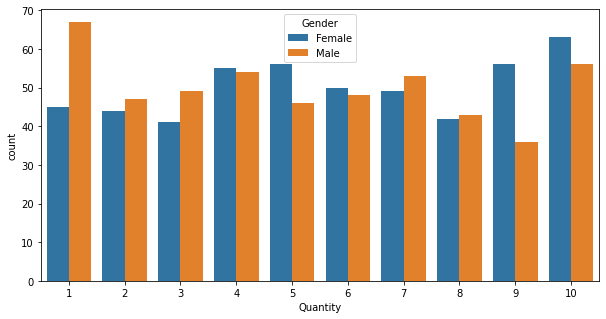

In [35]:
#creating countplot to findout who prefer to buy how much quantities 
plt.figure(figsize=(10,5))
sns.countplot(x='Quantity', hue='Gender', data=market)

## From this analysis we came to know that supermarket is litittle bit more popular with females rather than males, because females are ordered more products than males.

# Q. Which is the most popular payment method used by customers?

<AxesSubplot:xlabel='Payment', ylabel='count'>

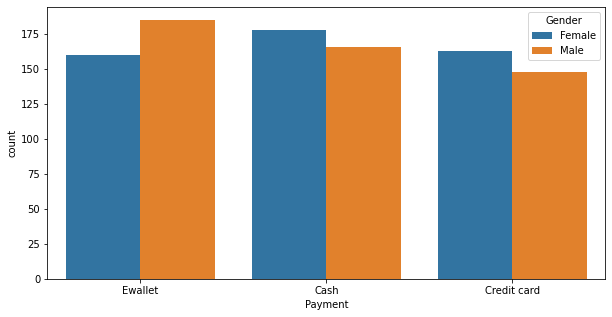

In [36]:
#creating count plot
plt.figure(figsize=(10,5))
sns.countplot(x= 'Payment', data =market,hue="Gender")

## From this analysis we came to know that womens are preferred Ewallet payment method more than cash payment or credit card payment. But Mens are prefer to use Cash payment over other payment method.

# Analyze customer rating

<function matplotlib.pyplot.legend(*args, **kwargs)>

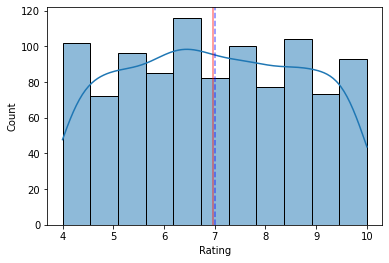

In [37]:
#creating histogram to analyze skewness.
sns.histplot(data= market["Rating"],kde=True)
plt.axvline(x=market.Rating.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=market.Rating.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend

## Wecan clearly see here, the data of customer ratings are normally distributed and it's mean equal to median.

# Q.What can you say about the aggregate sales across the branches? 

In [38]:
# Grouping branch and total sales in decending format.
sd=market[["Branch", "Total"]].groupby(['Branch'], as_index=False).sum().sort_values(by='Total', ascending=False)
sd

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


<AxesSubplot:xlabel='Branch', ylabel='Total'>

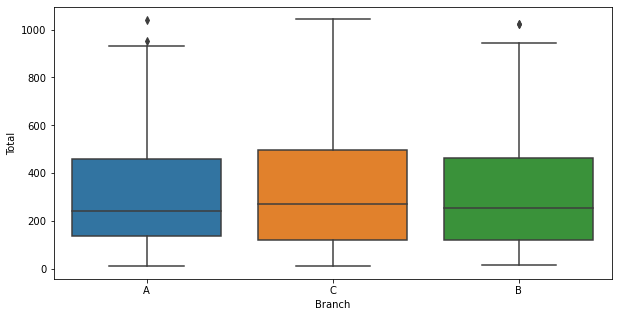

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x=market['Branch'], y=market['Total'])

## We can see here, overall sales of all branchs are almost same but barnch C sales slightly higher than other branches.

# Q.Does gross income affect customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross_income'>

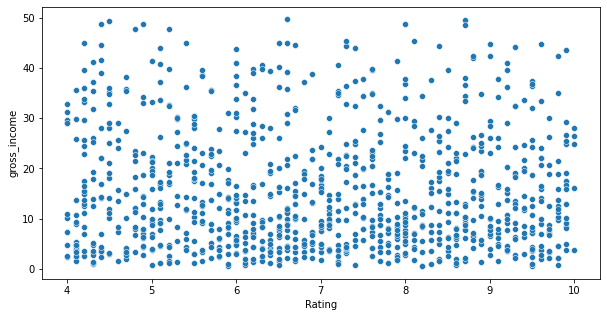

In [40]:
# To see relation we create scatter plot.
plt.figure(figsize=(10,5))
sns.scatterplot(market['Rating'], market['gross_income'])

## We can clearly see here there is  no relatin between gross income and customer ratings, so we can say gross income doesn't affect customer ratings. 

# Q.Which is the most profitable branch? 

In [41]:
#Grouping data
kd=market[["Branch", "gross_income"]].groupby(['Branch'], as_index=False).sum().sort_values(by='gross_income', ascending=False)
kd

,Branch,gross_income
2,C,5265.1765
0,A,5057.1605
1,B,5057.0320


<AxesSubplot:xlabel='Branch', ylabel='gross_income'>

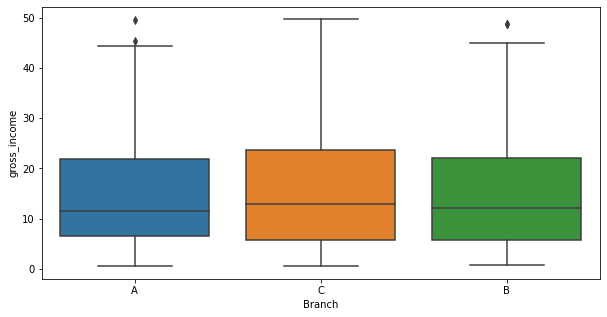

In [42]:
# create boxplot analyze which branch generate highest income
plt.figure(figsize=(10,5))
sns.boxplot(x=market['Branch'], y=market['gross_income'])

## From this visualization we came to know that branch C is is most profitable branch becuse it generate highest gross income.

<AxesSubplot:xlabel='Gender', ylabel='gross_income'>

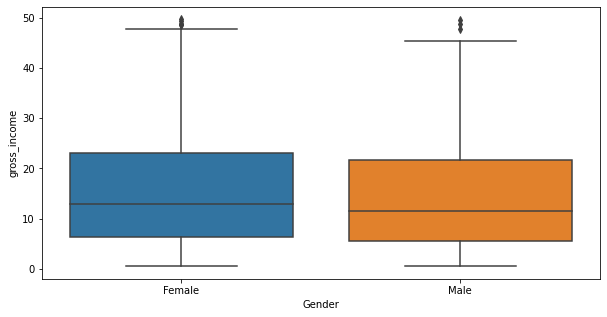

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=market['Gender'], y=market['gross_income'])

## Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

# Q.Can you see any time trend in gross income? 

<AxesSubplot:xlabel='Date', ylabel='gross_income'>

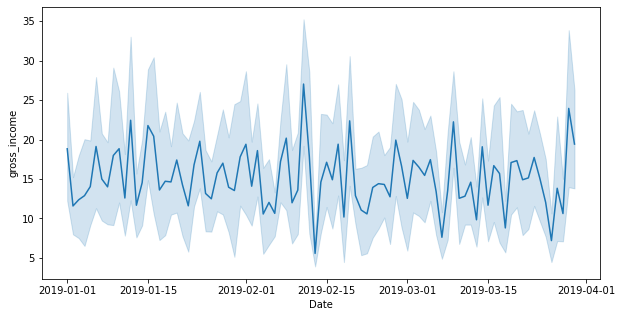

In [44]:
# Creating line plot to analyze time series
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='gross_income',data=market)

## We can see here gross income is fluctuate at every certain interval of time.

# Q.Which product line helps you generate the most income? 

In [45]:
# grouping productline and gross income.
bd=market[["Product_line", "gross_income"]].groupby(['Product_line'], as_index=False).sum().sort_values(by='gross_income', ascending=False)
bd

,Product_line,gross_income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


<AxesSubplot:xlabel='Product_line', ylabel='gross_income'>

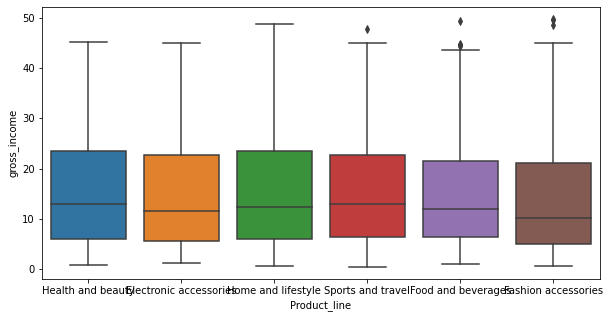

In [46]:
# creating box plot
plt.figure(figsize=(10,5))
sns.boxplot(x='Product_line', y='gross_income', data=market)

## From this analysis we came to know that Food and beverages and Sports and travel productline generate most income

# Q.What is the spending pattern of both males and females, meaning in which category do they spend more? 

<AxesSubplot:xlabel='Product_line', ylabel='count'>

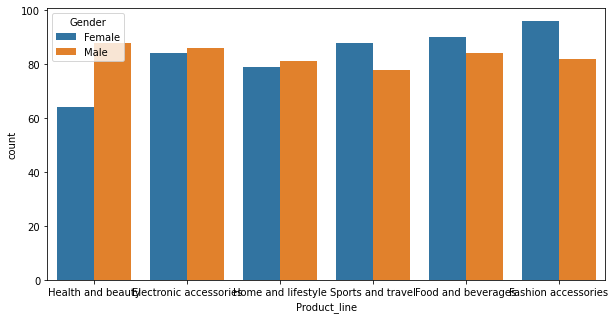

In [47]:
# creating count plot 
plt.figure(figsize=(10,5))
sns.countplot(x='Product_line', data =market,hue="Gender")

## Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

# Q.How many products are bought by customers? 

In [273]:
dd=market[["Customer_type", "Quantity"]].groupby(['Customer_type'], as_index=False).sum().sort_values(by='Quantity', ascending=False)
dd

,Customer_type,Quantity
0,Member,2785
1,Normal,2725


## Here we can see both Member and normal customer type buy nearly same quantity of products

<AxesSubplot:xlabel='Quantity', ylabel='count'>

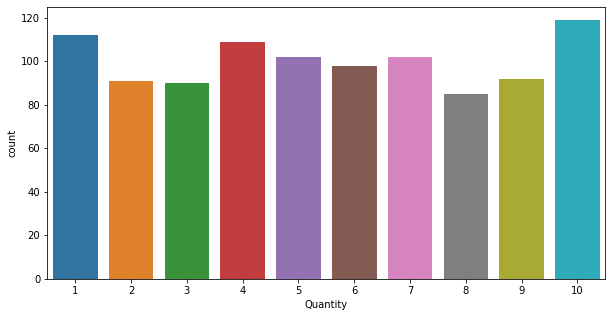

In [48]:
# creating countplot
plt.figure(figsize=(10,5))
sns.countplot(x= 'Quantity', data =market)

## We can clearly see that quantity 10 ordered highest time by customers

# Q.Which day of the week has maximum sales? 

In [50]:
# converting date to week day name
market['weekday'] = market['Date'].dt.day_name()

In [51]:
# grouping weekday and total sales
sd=market[["weekday", "Total"]].groupby(['weekday'], as_index=False).sum().sort_values(by='Total', ascending=False)
sd

,weekday,Total
2,Saturday,56120.8095
5,Tuesday,51482.2455
4,Thursday,45349.2480
3,Sunday,44457.8925
0,Friday,43926.3405
6,Wednesday,43731.1350
1,Monday,37899.0780


<AxesSubplot:xlabel='weekday', ylabel='Total'>

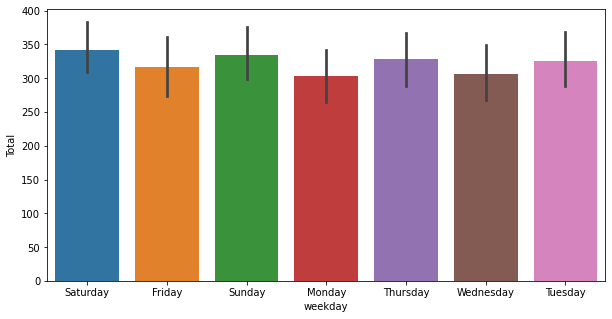

In [52]:
#creating bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=market['weekday'], y=market['Total'])

## Saturday of the week has maximum sales

# Q.Which hour of the day is busiest? 

In [284]:
#Extracting hour from time column and create new line
market['hour']=market['Time'].dt.hour
market.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_income,Rating,weekday,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,3.8200,9.6,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,16.2155,7.4,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,23.2880,8.4,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,30.2085,5.3,Friday,10


In [329]:
#grouping hour and quantity
md=market[["hour", "Quantity"]].groupby(['hour'], as_index=False).sum().sort_values(by='Quantity', ascending=False)
md

,hour,Quantity
9,19,649
3,13,585
5,15,530
0,10,525
1,11,513
2,12,501
4,14,495
8,18,475
6,16,420
7,17,415


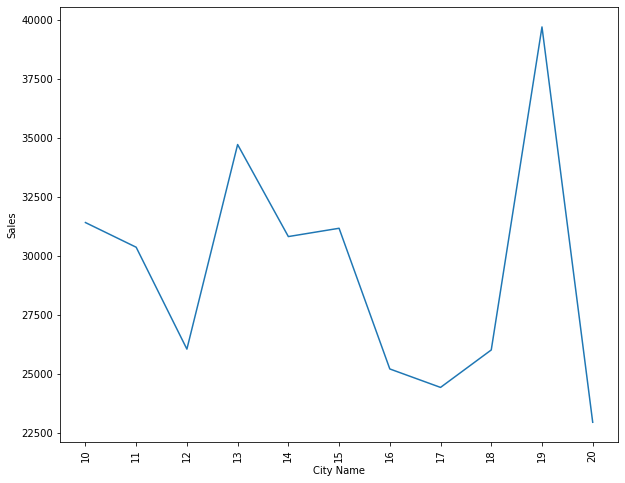

In [299]:
#creating lineplot
plt.figure(figsize=(10,8))
timing = [hour for hour, _ in market.groupby('hour')]

plt.plot(cities, results['Total'])
plt.xticks(timing, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('City Name')
plt.show()

## From this analysis we came to know at hour 19(technically 7.00pm evining) highest quantity of product sold, so 7.00pm is should is most busiest hour

# Q. Which product line should your supermarket focus on

In [53]:
# grouping productline and quantity
dd=market[["Product_line", "Quantity"]].groupby(['Product_line'], as_index=False).sum().sort_values(by='Quantity', ascending=True)
dd

,Product_line,Quantity
3,Health and beauty,854
1,Fashion accessories,902
4,Home and lifestyle,911
5,Sports and travel,920
2,Food and beverages,952
0,Electronic accessories,971


<AxesSubplot:xlabel='Product_line', ylabel='Rating'>

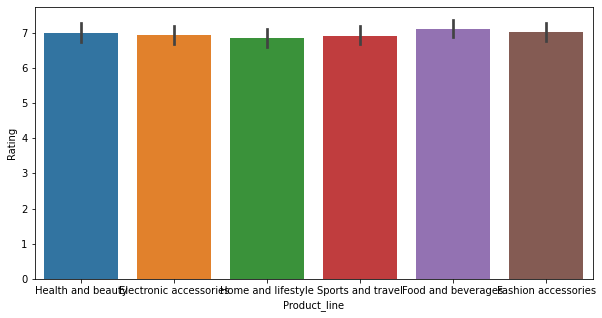

In [54]:
# analyzing rating of each product line
plt.figure(figsize=(10,5))
sns.barplot(x=market['Product_line'], y=market['Rating'])

## From this analysis we came to know that compare to other product line Health and beauty	products are sold less, but all product's rating are almost same, it means all products are equally popular. So as per the analysis Health and beauty product line needs to be focused  for improving sales.

# Q. Which city should be chosen for expansion and what products should be focussed on?

<AxesSubplot:xlabel='City', ylabel='gross_income'>

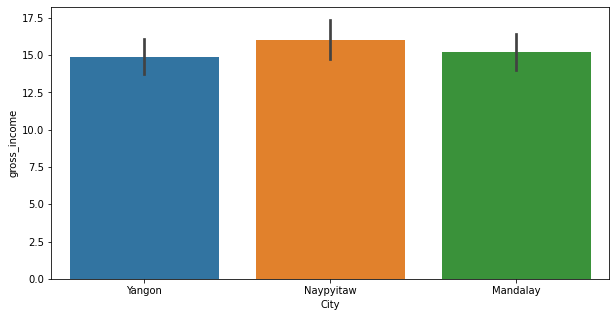

In [55]:
# creating barplot to analyse which city has the highest gross income
plt.figure(figsize=(10,5))
sns.barplot(x=market['City'], y=market['gross_income'])

## As we can clearly see that Naypyitaw City is most profitable city and should be chosen for expansion 

In [315]:
group = market.groupby(['City','Product_line']).sum()
dd = group['Quantity'].groupby(level=0, group_keys=False)
dd.nlargest(5)

City       Product_line          
Mandalay   Sports and travel         322
           Health and beauty         320
           Electronic accessories    316
           Fashion accessories       297
           Home and lifestyle        295
Naypyitaw  Food and beverages        369
           Fashion accessories       342
           Electronic accessories    333
           Health and beauty         277
           Sports and travel         265
Yangon     Home and lifestyle        371
           Sports and travel         333
           Electronic accessories    322
           Food and beverages        313
           Fashion accessories       263
Name: Quantity, dtype: int64

## we needs to focused on Food and beverages  and Fashion accessories. Becuse these products are sold most in this city, these can give us more profit. 